Как рисовать на комплексной плоскости, используя `numpy`?

In [2]:
import matplotlib.pyplot as plt
import numpy as np

cnums = np.arange(5) + 1j * np.arange(6,11)
X = [x.real for x in cnums]
Y = [x.imag for x in cnums]
plt.scatter(X,Y, color='red')
plt.show()

<Figure size 640x480 with 1 Axes>

Для каждой точки комплексной плоскости $c = x + i \cdot y$ :

In [5]:
def mandelbrot(n, c):
    if not n: return 0
    return mandelbrot(n - 1, c) ** 2 + c

Где $Z_n$ - комплексное число $n$-ой итерации

In [6]:
mandelbrot(3, 5 + 7j).imag

-2919.0

In [7]:
import matplotlib.pyplot as plt
from functools import lru_cache
import numpy as np

@lru_cache(maxsize=128)
def inf_border(z):
    return abs(z) > 4

def mandelbrot(n, c):
    if not n: return 0
    zprev = mandelbrot(n - 1, c)
    return zprev if inf_border(zprev) else zprev ** 2 + c

Выяснилось, что рекурсивная реализация функции не соответствует поставленным задачам

Использованные источники: 

- [Практикум по математике и Python](https://stepik.org/course/3356/syllabus)
- [Множество Мандельброта](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D0%9C%D0%B0%D0%BD%D0%B4%D0%B5%D0%BB%D1%8C%D0%B1%D1%80%D0%BE%D1%82%D0%B0)
- [Рисуем Мандельброта с помощью Python и Numpy](https://ischurov.github.io/mandelbrot.html)
- [Немного о картинках](https://ischurov.github.io/unstable-pics.html)
- [Mandelbrot Fractal Set visualization in Python](https://www.geeksforgeeks.org/mandelbrot-fractal-set-visualization-in-python/)

In [8]:
def mandelbrot(pmin, pmax, ppoints, qmin, qmax, qpoints, max_iterations=200, infinity_border=10):
    image = np.zeros((ppoints, qpoints))
    p, q = np.mgrid[pmin:pmax:(ppoints*1j), qmin:qmax:(qpoints*1j)]
    c = p + 1j*q
    z = np.zeros_like(c)
    for k in range(max_iterations):
        z = z**2 + c
        mask = (np.abs(z) > 10) & (image == 0) #Интересные эффекты получаются при значении границы 0 < abs < 1
        f = 3 * k ** 2 + 7 * k - 23
        image[mask] = f
        z[mask] = np.nan
    return -image.T

C:\Users\xenia\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


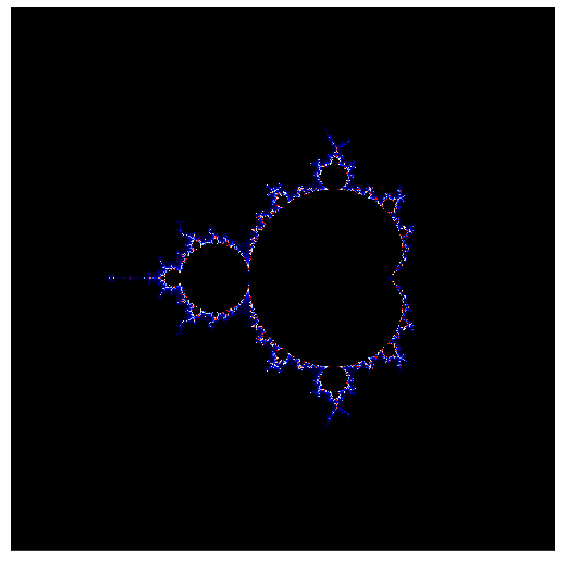

In [9]:
plt.figure(figsize=(10, 10))
image = mandelbrot(-2.5, 1.5, 500, -2, 2, 500)
plt.xticks([])
plt.yticks([])
plt.imshow(image, cmap='flag', interpolation='none')

In [5]:
def serpinsky(pmin, pmax, ppoints, qmin, qmax, qpoints):
    image = np.zeros((ppoints, qpoints))
    for ip, p in enumerate(np.linspace(pmin, pmax, ppoints)):
        for iq, q in enumerate(np.linspace(qmin, qmax, qpoints)):
            image[ip,iq] = 0 if ip & iq == 0 else 150
    return image

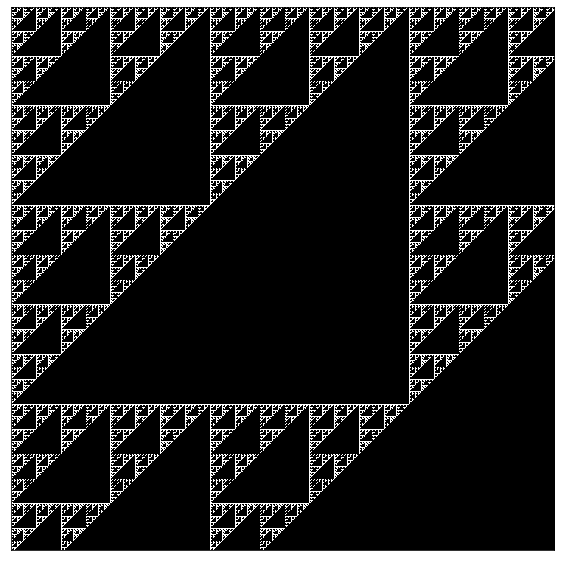

In [13]:
plt.figure(figsize=(10, 10))
image = serpinsky(-4, 0, 700, -4, 0, 700)
plt.xticks([])
plt.yticks([])
plt.imshow(image, cmap='Greys', interpolation='none')

\+ Ковер Серпинского, Сетка Апполония, Множество Жулиа, Дерево Пифагора, Кривая Дракона, Кривая Коха, Кривая Пеано
3blue1brown о размерности Хаусдорфа в ноутбук